## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [2]:
df = pd.read_csv("fifa.csv")

## 2. Check the first few samples, shape, info of the data

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.shape

(18207, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

## 3. Drop the redundant columns

In [6]:
redundant_columns = ['Photo', 'Flag', 'Club Logo']
df.drop(columns=redundant_columns, inplace=True)

## 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix.

In [9]:
def convert_currency(value):
    if isinstance(value, float):
        return value
    else:
        value = value.replace('€', '')
        if 'M' in value:
            value = float(value.replace('M', '')) * 1000000
        elif 'K' in value:
            value = float(value.replace('K', '')) * 1000
        return float(value)


In [14]:
df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)
df['Release Clause'] = df['Release Clause'].apply(convert_currency)

print(df['Value'])
print(df['Wage'])
print(df['Release Clause'])

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64
0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64
0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64


## 5. Convert the column "Joined" into integer data type with keeping only the year.

In [11]:
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

In [13]:
print(df['Joined'])

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64


## 6. Convert the column "Contract Valid Until" to pandas datetime type.

In [20]:
# Preprocess data to add default month and day
df['Contract Valid Until'] = df['Contract Valid Until'].apply(lambda x: 'Jan 01, ' + str(x) if len(str(x)) == 4 else x)

# Convert column to pandas datetime type
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'], format='%b %d, %Y')


In [21]:
print(df['Contract Valid Until'])

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]


## 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.

In [23]:
df['Height'] = df['Height'].apply(lambda x: float(x.replace("'", ".")) if isinstance(x, str) else x)

In [24]:
print(df['Height'])

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64


## 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [25]:
df['Weight'] = df['Weight'].apply(lambda x: float(x.replace("lbs", "")) if isinstance(x, str) else x)

In [26]:
print(df['Weight'])

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64


## 9. Check for the percentage of missing values and impute them with appropriate imputation techniques.

In [27]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

In [29]:
# Impute missing values in numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute missing values in categorical columns with most frequent value
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [30]:
print(df[numerical_columns])

           ID  Age  Overall  Potential        Value      Wage  \
0      158023   31       94         94  110500000.0  565000.0   
1       20801   33       94         94   77000000.0  405000.0   
2      190871   26       92         93  118500000.0  290000.0   
3      193080   27       91         93   72000000.0  260000.0   
4      192985   27       91         92  102000000.0  355000.0   
...       ...  ...      ...        ...          ...       ...   
18202  238813   19       47         65      60000.0    1000.0   
18203  243165   19       47         63      60000.0    1000.0   
18204  241638   16       47         67      60000.0    1000.0   
18205  246268   17       47         66      60000.0    1000.0   
18206  246269   16       46         66      60000.0    1000.0   

       International Reputation  Weak Foot  Skill Moves  Jersey Number  ...  \
0                           5.0        4.0          4.0           10.0  ...   
1                           5.0        4.0          5.0      

In [31]:
print(df[categorical_columns])

                     Name Nationality                 Club Preferred Foot  \
0                L. Messi   Argentina         FC Barcelona           Left   
1       Cristiano Ronaldo    Portugal             Juventus          Right   
2               Neymar Jr      Brazil  Paris Saint-Germain          Right   
3                  De Gea       Spain    Manchester United          Right   
4            K. De Bruyne     Belgium      Manchester City          Right   
...                   ...         ...                  ...            ...   
18202        J. Lundstram     England      Crewe Alexandra          Right   
18203  N. Christoffersson      Sweden       Trelleborgs FF          Right   
18204           B. Worman     England     Cambridge United          Right   
18205      D. Walker-Rice     England      Tranmere Rovers          Right   
18206           G. Nugent     England      Tranmere Rovers          Right   

            Work Rate   Body Type Position Loaned From  
0      Medium/ Med

## 10. Plot the distribution of Overall rating for all the players

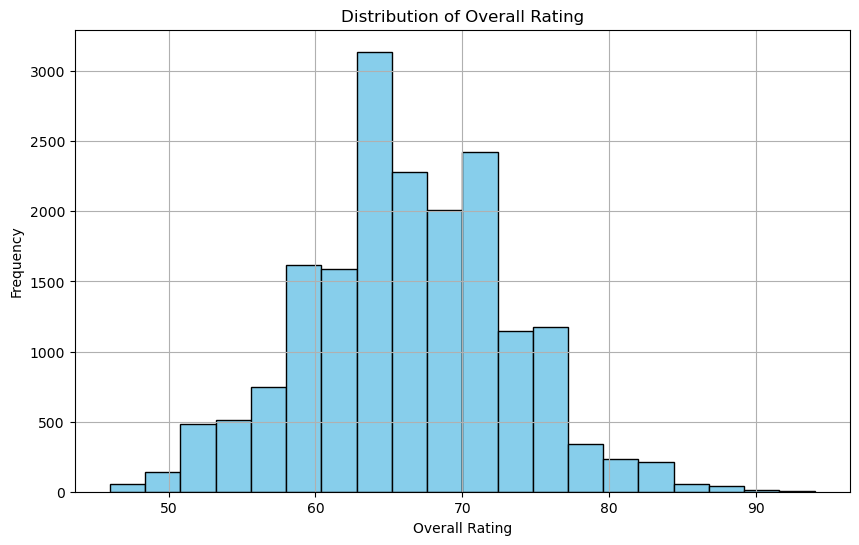

In [34]:
plt.figure(figsize=(10,6))
plt.hist(df['Overall'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 11. Retrieve the names of top20 players based on the Overall rating

In [35]:
top_20_players = df.nlargest(20, 'Overall')['Name']
print("Top 20 players based on Overall rating:")
print(top_20_players)

Top 20 players based on Overall rating:
0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
9              J. Oblak
10       R. Lewandowski
11             T. Kroos
12             D. Godín
13          David Silva
14             N. Kanté
15            P. Dybala
16              H. Kane
17         A. Griezmann
18        M. ter Stegen
19          T. Courtois
Name: Name, dtype: object


# 12. Generate a dataframe including all information of the top 20 players

In [36]:
top_20_df = df.nlargest(20, 'Overall')
print(top_20_df)

        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   200389           J. Oblak   25    Slovenia       90         93   
10  188545     R. Lewandowski   29      Poland       90         90   
11  182521           T. Kroos   28     Germany       90         90   
12  182493           D. Godín   32     Uruguay       90         90   
13  168542        Da

# 13. Calculate the average "Age" and "Wage" of the top 20 players

In [38]:
avg_age = top_20_df['Age'].mean()
print("Average Age of top 20 players:", avg_age)

Average Age of top 20 players: 28.3


In [40]:
avg_wage = top_20_df['Wage'].mean()
print("Average Wage of top 20 players:", avg_wage)

Average Wage of top 20 players: 289700.0


# 14. Find the player with the highest wage among the top 20 players

In [41]:
player_highest_wage= top_20_df.loc[top_20_df['Wage'].idxmax(), ['Name','Wage']]

print("Player with the highest wage among the top 20 players:")
print(player_highest_wage)

Player with the highest wage among the top 20 players:
Name    L. Messi
Wage    565000.0
Name: 0, dtype: object


# 15. Generate a dataframe including "Player name", "Club Name", "Wage", and 'Overall rating'.

In [42]:
player_club_wage_overall = df[['Name','Club', 'Wage','Overall']]
print(player_club_wage_overall)

                     Name                 Club      Wage  Overall
0                L. Messi         FC Barcelona  565000.0       94
1       Cristiano Ronaldo             Juventus  405000.0       94
2               Neymar Jr  Paris Saint-Germain  290000.0       92
3                  De Gea    Manchester United  260000.0       91
4            K. De Bruyne      Manchester City  355000.0       91
...                   ...                  ...       ...      ...
18202        J. Lundstram      Crewe Alexandra    1000.0       47
18203  N. Christoffersson       Trelleborgs FF    1000.0       47
18204           B. Worman     Cambridge United    1000.0       47
18205      D. Walker-Rice      Tranmere Rovers    1000.0       47
18206           G. Nugent      Tranmere Rovers    1000.0       46

[18207 rows x 4 columns]


# 15(i) Find the average Overall rating for each club

In [44]:
avg_overall_rating_per_club = player_club_wage_overall.groupby('Club')['Overall'].mean()
print('avg_overall_rating_per_club is :', avg_overall_rating_per_club)

avg_overall_rating_per_club is : Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64


# 15(ii) Display the average overall rating of Top10 Clubs using a plot

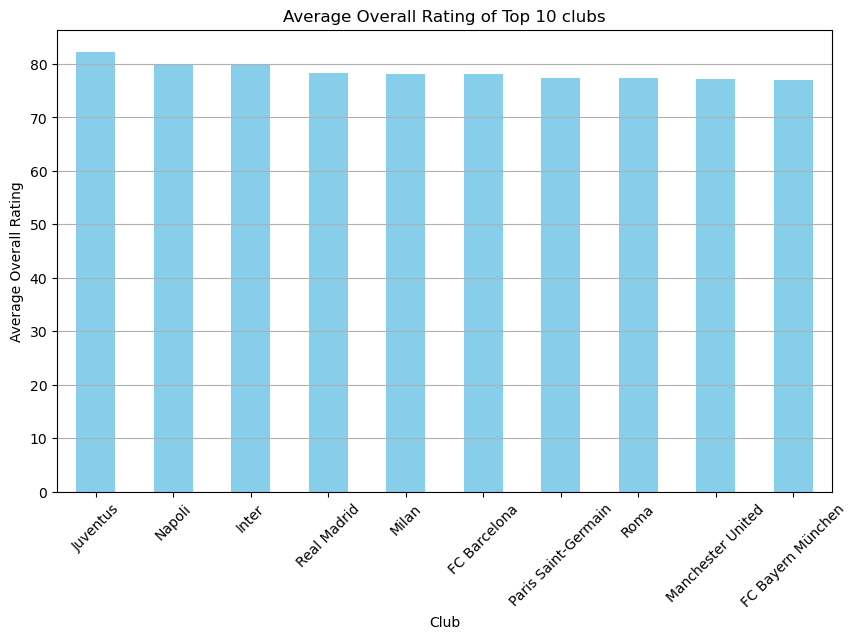

In [45]:
top_10_clubs = avg_overall_rating_per_club.nlargest(10)
plt.figure(figsize=(10,6))
top_10_clubs.plot(kind='bar', color='skyblue')
plt.title('Average Overall Rating of Top 10 clubs')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 16. Visualize the relationship between age and individual potential of the player

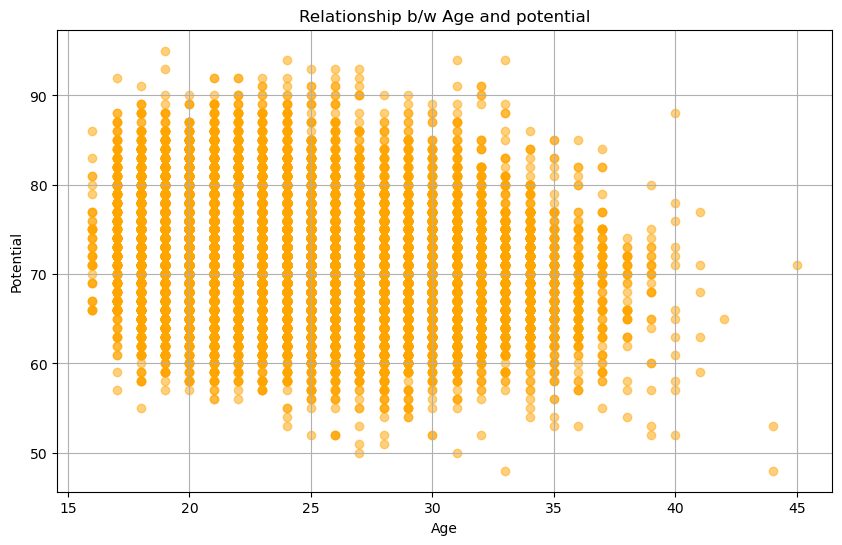

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['Potential'], alpha=0.5, color='orange')
plt.title('Relationship b/w Age and potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.grid(True)
plt.show()

# 17. Which features directly contribute to the wages of the players?# 
Support your answer with a plot and a metric. (2 points) (hint: us
potential, Overall, value, international reputation, and Release Clause)

In [48]:
columns = ['Overall', 'Potential', 'Value', 'International Reputation', 'Release Clause', 'Wage']

In [50]:
correlation_matrix = df[columns].corr()
print(correlation_matrix)

                           Overall  Potential     Value  \
Overall                   1.000000   0.660939  0.627085   
Potential                 0.660939   1.000000  0.576218   
Value                     0.627085   0.576218  1.000000   
International Reputation  0.499243   0.372375  0.653059   
Release Clause            0.597821   0.562346  0.972041   
Wage                      0.571926   0.486413  0.858442   

                          International Reputation  Release Clause      Wage  
Overall                                   0.499243        0.597821  0.571926  
Potential                                 0.372375        0.562346  0.486413  
Value                                     0.653059        0.972041  0.858442  
International Reputation                  1.000000        0.620863  0.668515  
Release Clause                            0.620863        1.000000  0.828161  
Wage                                      0.668515        0.828161  1.000000  


<Axes: >

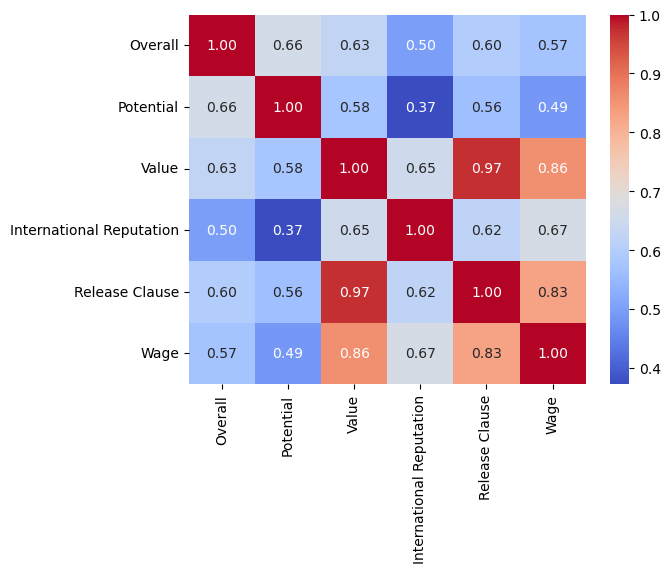

In [53]:
# Plot heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 18. Find the position in the pitch where the maximum number of players # 
play and the position where the minimum number of players play? Displa 
it using a plot. (2 points)

In [58]:
# Count occurrences of each position
position_counts = df['Position'].value_counts()

# Find the position with the maximum number of players
max_position = position_counts.idxmax()
max_count = position_counts.max()

# Find the position with the minimum number of players
min_position = position_counts.idxmin()
min_count = position_counts.min()

print(f"The position with the maximum number of players is {max_position} with {max_count} players.")
print(f"The position with the minimum number of players is {min_position} with {min_count} players.")

The position with the maximum number of players is ST with 2212 players.
The position with the minimum number of players is LF with 15 players.


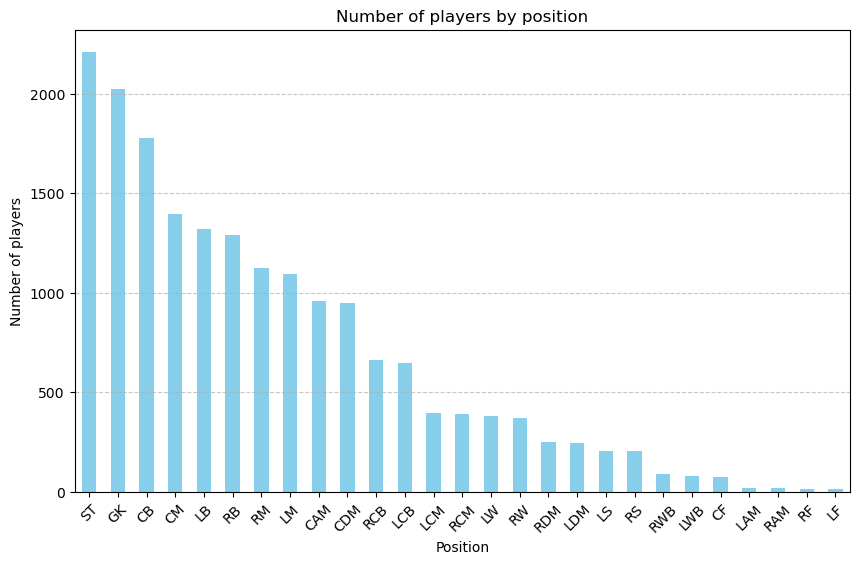

In [60]:
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar',color='skyblue')
plt.title('Number of players by position')
plt.xlabel('Position')
plt.ylabel('Number of players')
plt.xticks(rotation=45)
plt.grid(axis = 'y', linestyle='--', alpha=0.7)
plt.show()

# 19. How many players are from the club 'Juventus' and the wage is greater 
# than 200K?  Display all the information of such players. (2 points)

In [61]:
juventus_players_high_wage = df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]
print("Number of players from Juventus with wage greater than 200K:", len(juventus_players_high_wage))
print("Details of players from Juventus with wage greater than 200K:")
print(juventus_players_high_wage)

Number of players from Juventus with wage greater than 200K: 3
Details of players from Juventus with wage greater than 200K:
        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Composure  Marking  \
1   77000000.0  405000.0          Right  ...       95.0     28.0   
15  89000000.0  205000.0           Left  ...       84.0     23.0   
24  27000000.0  215000.0           Left  ...       84.0     93.0   

    StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
1             31.0          23.0      7.0       11.0       15.0   
15            20.0          20.0      5.0        4.0        4.0   
24            93.0          90.0      3.0        3.0        2.0   

    GKPositi

## 20. Generate a data frame containing top 5 players by Overall rating for

each unique position)

In [62]:
df_sorted = df.sort_values(by='Overall', ascending=False)

In [63]:
def top_5_players(group):
    return group.head(5)

In [64]:
top_players_by_position = df_sorted.groupby('Position').apply(top_5_players)

In [66]:
top_players_by_position.reset_index(drop=True, inplace=True)
print(top_players_by_position)

         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    176635            M. Özil   29     Germany       86         86   
3    189596          T. Müller   28     Germany       86         86   
4    201942    Roberto Firmino   26      Brazil       86         87   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  153079          S. Agüero   30   Argentina       89         89   
133  202126            H. Kane   24     England       89         91   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...    

# 21. What is the average wage one can expect to pay for the top 5 players 
# 
in every position? (use the data frame created in Q19) (2 points)

In [67]:
average_wage_by_position = top_players_by_position.groupby('Position')['Wage'].mean()
print(average_wage_by_position)


Position
CAM    174000.0
CB     124800.0
CDM    199200.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    195400.0
LDM    138000.0
LF     123200.0
LM     169000.0
LS     130600.0
LW     261000.0
LWB     33000.0
RAM     46600.0
RB     155400.0
RCB    219000.0
RCM    257400.0
RDM    105000.0
RF     148000.0
RM     133000.0
RS     130400.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64
